<a href="https://colab.research.google.com/github/ANDOOR/DataVizFall2020_Colab/blob/master/Class_Activity_Lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize New York times database for COVID-19
## Case study Bristol and Suffolk, MA

## Loading US County Level Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(db)


# Explore data

In [55]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [52]:
df.nunique()

date        234
county     1923
state        55
fips       3205
cases     16027
deaths     2381
dtype: int64

In [6]:
df_bristol = df[(df['county']=='Bristol') & (df['state']=='Massachusetts')]['fips'].unique()[0]
df_bristol




25005.0

In [7]:
df_suffolk = df[(df['county']=='Suffolk') & (df['state']=='Massachusetts')]['fips'].unique()[0]
df_suffolk

25025.0

In [8]:
print("Bristol_fips =",df_bristol)
print("Suffolk_fips =",df_suffolk)

Bristol_fips = 25005.0
Suffolk_fips = 25025.0


In [9]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards
#print("Bristol_fips",df_bristol)

In [92]:
df1 = df.set_index('date')
df1.sort_index(ascending= False)

,county,state,fips,cases,deaths,daily,daily_deaths
date,,,,,,,
2020-09-10,Weston,Wyoming,56045.0,21,0,-89.0,-6.0
2020-09-10,McCracken,Kentucky,21145.0,579,6,466.0,4.0
2020-09-10,Muhlenberg,Kentucky,21177.0,708,12,657.0,12.0
2020-09-10,Morgan,Kentucky,21175.0,51,0,-163.0,-1.0
2020-09-10,Montgomery,Kentucky,21173.0,214,1,38.0,-3.0
...,...,...,...,...,...,...,...
2020-01-24,Snohomish,Washington,53061.0,1,0,0.0,0.0
2020-01-24,Cook,Illinois,17031.0,1,0,0.0,0.0
2020-01-23,Snohomish,Washington,53061.0,1,0,0.0,0.0


In [93]:
#df1 = df[df['fips']==fips][['date','county','state','cases','deaths']]

In [111]:
def get_county_stat(df, fips):
  #df1 = df[['date','county','state','cases','deaths']](df['fips']==fips)
  
  df1 = df[df['fips']==fips][['date','county','state','cases','deaths']].copy()
  df1.set_index('date', inplace=True)
  df1.index = pd.to_datetime(df1.index)
  return df1





get_county_stat(df,df_bristol).head()

,county,state,cases,deaths
date,,,,
2020-01-26,Los Angeles,California,1,0
2020-01-27,Los Angeles,California,1,0
2020-01-28,Los Angeles,California,1,0
2020-01-29,Los Angeles,California,1,0
2020-01-30,Los Angeles,California,1,0


## Explore data type

In [36]:
df_Bristol = get_county_stat(df,25005)
df_Suffolk = get_county_stat(df,25025)


Text(0.5, 1.0, 'Deaths Comparison')

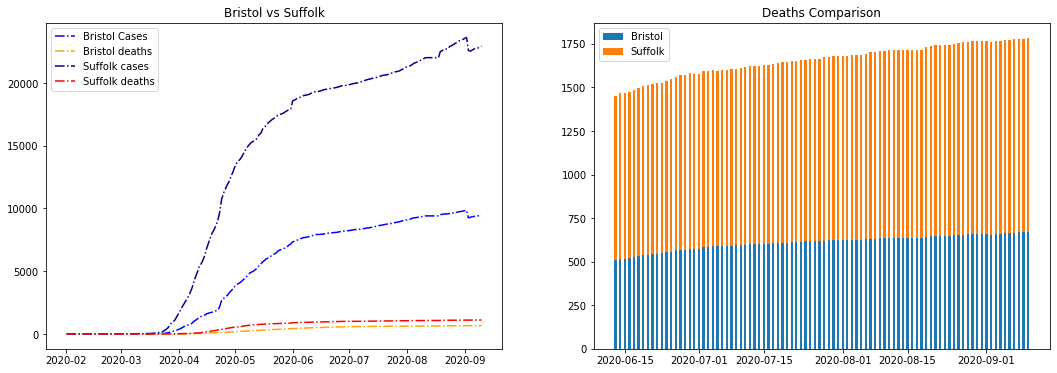

In [44]:
f,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(df_Bristol.index,df_Bristol.cases,c='b',ls='-.',label='Bristol Cases',fillstyle='none')
#ax[0].plot(df_Bristol.index,df_Bristol.cases,'-.',color='steelblue',label='Bristol cases')
ax[0].plot(df_Bristol.index,df_Bristol.deaths,c='orange',ls='-.',label='Bristol deaths',fillstyle='none')
ax[0].plot(df_Suffolk.index,df_Suffolk.cases,c='darkblue',ls='-.',label='Suffolk cases',fillstyle='none')
ax[0].plot(df_Suffolk.index,df_Suffolk.deaths,c='red',ls='-.',label='Suffolk deaths',fillstyle='none')
ax[0].legend()
ax[0].set_title('Bristol vs Suffolk')

barWidth = 0.5
past = -90
ax[1].bar(df_Bristol.index[past:],df_Bristol.deaths[past:], width=barWidth, label = 'Bristol')
ax[1].bar(df_Suffolk.index[past:],df_Suffolk.deaths[past:], width=barWidth, label = 'Suffolk', bottom=df_Bristol.deaths[past:])
ax[1].legend()
ax[1].set_title('Deaths Comparison')


In [117]:
df['daily'] = df.groupby('county')['cases'].diff().fillna(0)
df['daily_deaths'] = df.groupby('county')['deaths'].diff().fillna(0)
#df['daily'] = df['daily'].rolling(window = 3).max()
df.tail(30)

,date,county,state,fips,cases,deaths,daily,daily_deaths
521504,2020-09-10,Washburn,Wisconsin,55129.0,80,0,1.0,0.0
521505,2020-09-10,Washington,Wisconsin,55131.0,1903,31,1470.0,21.0
521506,2020-09-10,Waukesha,Wisconsin,55133.0,6511,81,67.0,3.0
521507,2020-09-10,Waupaca,Wisconsin,55135.0,888,19,5.0,0.0
521508,2020-09-10,Waushara,Wisconsin,55137.0,215,2,9.0,0.0
521509,2020-09-10,Winnebago,Wisconsin,55139.0,1882,22,1694.0,12.0
521510,2020-09-10,Wood,Wisconsin,55141.0,570,3,243.0,-2.0
521511,2020-09-10,Albany,Wyoming,56001.0,212,0,-2647.0,-122.0
521512,2020-09-10,Big Horn,Wyoming,56003.0,51,1,-699.0,-16.0
521513,2020-09-10,Campbell,Wyoming,56005.0,214,1,-145.0,-2.0


In [119]:


cases = df.groupby('county').agg({'daily':'sum'}).sort_values(by='daily', ascending= False)
cases.head(30)


,daily
county,
Los Angeles,251023.0
New York City,241685.0
Miami-Dade,162892.0
Maricopa,136570.0
Harris,113500.0
Dallas,77946.0
Broward,73867.0
Riverside,54867.0
San Bernardino,50209.0


In [114]:


deaths = df.groupby('county').agg({'daily_deaths':'sum'}).sort_values(by='deaths', ascending= False)
deaths.head(10)

,daily_deaths
county,
New York City,23741.0
Los Angeles,6128.0
Maricopa,3133.0
Miami-Dade,2789.0
Harris,2363.0
Nassau,2199.0
Bergen,2040.0
Suffolk,2006.0
Philadelphia,1781.0


## Top 10 counties by number of cases and deaths 



```
# This is formatted as code
```





## Death rate Per FIPS 

## <font color = red> Bonus Point</font>

### A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate </font>

ALL COUNTIES

<br>

### def Folium_Choropleth(type = 'cases',date=''):

<br>

## Due for Bonus point : Friday (09/11/2020 11:59pm)

In [84]:
import folium    
from folium import plugins